# MRI Home Assignment - Mental Imagery
### Liz Endecott

Date completed: December 5, 2025

Neurosynth link: https://neurosynth.org/analyses/terms/mental%20imagery/

### 1. Create file paths for the anatomical and uniformity files. 

In order to use this notebook, have both .nii files in the same folder in your current working directory.

Glob locates and prints the names of the two .nii files for user reference. 

Pathlib's Path is used because of its cross-platform consistency (more adaptable to different operating systems). 

The final lines in this cell confirm paths from the current working directory to each .nii file have been created. 

In [7]:
import glob
from pathlib import Path

#locate and list .nii files
print(glob.glob('*.nii'))

#create variable for current working directory
my_dir = Path.cwd()
#print(Path.cwd())

#create paths from current working directory to each file
ana_path = my_dir / "anatomical.nii"
uni_path = my_dir / "mental imagery_uniformity-test_z_FDR_0.01.nii"

#confirm each path was created
print(ana_path.exists())
print(uni_path.exists())


['anatomical.nii', 'mental imagery_uniformity-test_z_FDR_0.01.nii']
True
True


### 2. Use Nilearn to create 3 visualizations of the brain regions associated with mental imagery.

These XYZ coordinates were chosen for displaying high activity in the relative brain regions. 

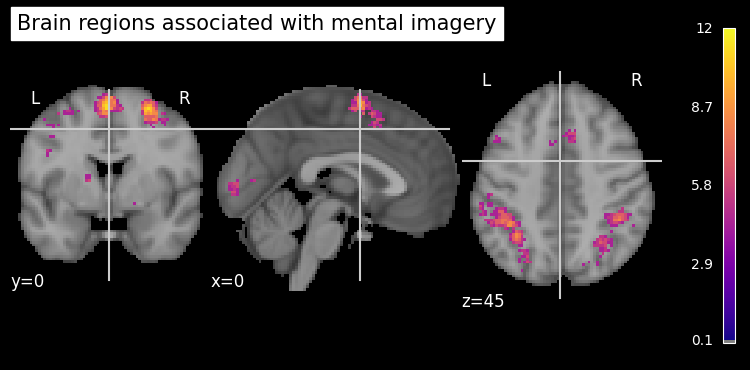

In [5]:
from nilearn import plotting

plotting.plot_stat_map(
    uni_path, ana_path, 
    cut_coords=(0,0,45), #(X,Y,Z)
    title = 'Brain regions associated with mental imagery', 
    threshold= 0.1, 
    cmap = "plasma",
)

### 3. Use Nibabel and Matplotlib to create histogram of MRI uniformity data. 

This histogram shows the distribution of uniformity data from 84 studies. 

Text(0, 0.5, 'Voxel count')

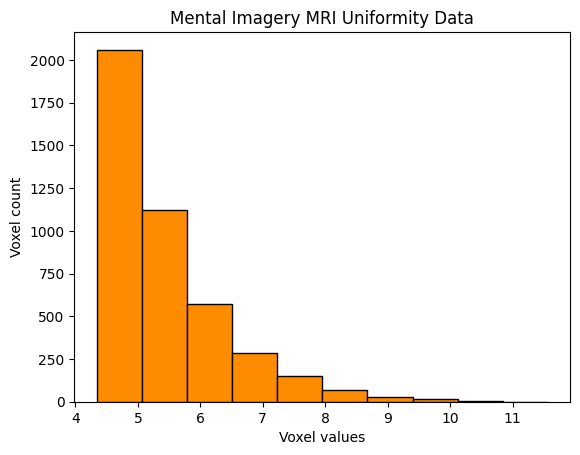

In [6]:
import nibabel as nib
import matplotlib.pyplot as plt

#load data from uniformity file
img = nib.load(uni_path) 
data=img.get_fdata()

#filter for positive data
pos=data[data>0]

#create histogram
fig= plt.hist(pos, bins= 10, color = 'darkorange', edgecolor = 'black')

#add title and axes labels
plt.title('Mental Imagery MRI Uniformity Data')
plt.xlabel('Voxel values')
plt.ylabel('Voxel count')
